In [1]:
import matplotlib.pyplot as plt
from numpy.linalg import inv
import numpy as np
from numpy import linspace
import sys
from numpy.linalg import norm
from math import fabs, log2, log10

In [2]:
alpha = 3 #Коэффициент рождаемости “жертв”
beta = 2e-3 #Коэффициент убыли “жертв”
sigma = 6e-4 #Коэффициент рождаемости “хищников”
gamma = 0.5 #Коэффициент убыли “хищников”
 
exact_x = np.array((833.33333333, 1500.))
X_k = []
X_k_plus_1 = []

In [5]:
'''
Модель Лотки-Вольтерры
'''
def f(x):
    f_x = [alpha * x[0] - beta * x[0] * x[1],
           sigma * x[0] * x[1] - gamma * x[1]]
    return np.array(f_x)
 
'''
Матрица Якоби
'''
def Jacobian_matrix(x):
    J = [[alpha - beta * x[1], - beta * x[0]],
         [sigma * x[1], sigma * x[0] - gamma]]
    return np.array(J)
 
def h(M):
    return np.dot(M, M.T)
 
'''
Метод градиентного спуска
'''
def gradient_descent(x_0, f, J):
    eps = 10e-4
    x = np.array((1,1))
    t = [0] * 3
    i = 0
    while 1:
        z = np.dot(J(x_0).T, f(x_0))
        if (z[0] == 0 and z[1] == 0):
            return x_0, i
        z_n = z / norm(z)
        t[0] = 0
        t[2] = 1
        while (h(f(x_0 - t[2] * z_n)) - h(f(x_0 - t[0] * z_n))) > 0:
            t[2] /= 2
        if t[2] < 10e-4:
            t[2] = 10e-4
        t[1] = t[2] / 2
        a = h(f(x_0 - t[0] * z_n)) / ((t[0] - t[1]) * (t[0] - t[2]))
        b = h(f(x_0 - t[1] * z_n)) / ((t[1] - t[0]) * (t[1] - t[2]))
        c = h(f(x_0 - t[2] * z_n)) / ((t[2] - t[0]) * (t[2] - t[1]))
        t_k = (a * (t[1] + t[2]) + b * (t[0] + t[2]) + c * (t[0] + t[1])) / (2 * (a + b + c))
        x = x_0 - t_k * z_n
        X_k_plus_1.append(norm(x - exact_x, np.inf))
        X_k.append(norm((x_0 - exact_x), np.inf))
        i += 1
        if norm(np.subtract(x, x_0), np.inf) <= eps:
            break
        x_0 = x      
    return x, i
 
def f_x(x, lamb):
    return 3 * x * lamb

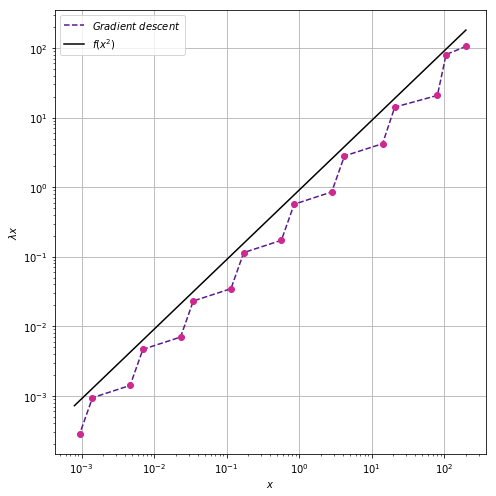

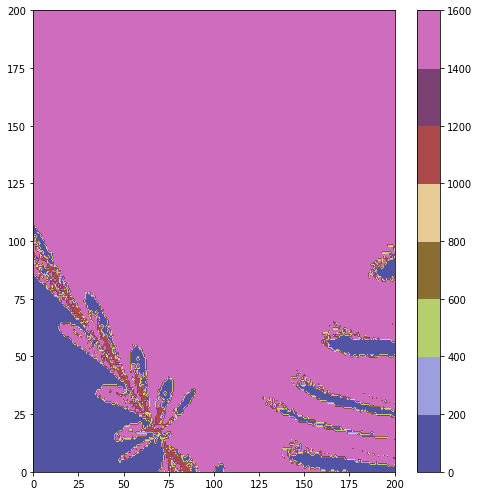

In [6]:
'''
Вывод сходимости метода
'''
x_0 = np.array((630, 1695))
x, n = gradient_descent(x_0, f, Jacobian_matrix)
X = np.logspace(-3.1, 2.3, n)
lamb = X_k_plus_1[n - 1] / X_k[n - 1]
lamb_x = [f_x(X[i], lamb) for i in range(n)]
 
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (7, 7))
axes.loglog(X_k, X_k_plus_1, '--', color="#551A8B", label="$Gradient\ descent$", basex=10, basey=10)
axes.loglog(X_k, X_k_plus_1, 'o', color="#CD2990", basex=10, basey=10)
axes.loglog(X, lamb_x, '-', color="black", label="${f(x^{2})}$", basex=10, basey=10)
axes.set_xlabel('$x$')
axes.set_ylabel('${\lambda}x$')
axes.legend(loc='upper left');
axes.grid()
fig.tight_layout()
plt.show()
fig.savefig("gradient_descent_conv.png", dpi = 380)
    
'''
Вывод матрицы супремум-норм
'''
size = 201
x_0 = np.array((15, 15))
 
M_sup = np.eye(size)
for i in range(size):
    for j in range(size):
        x_0[0] = 15 * i
        x_0[1] = 15 * j
        x, ind = gradient_descent(x_0, f, Jacobian_matrix)
        M_sup[i][j] = np.linalg.norm(x, np.inf)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
fig.tight_layout()
fig.colorbar(axes.contourf(linspace(0, size - 1, size), linspace(0, size - 1, size), M_sup, cmap=plt.cm.tab20b))
fig.savefig("gradient_descent.png", dpi=280)